Matplotlib is building the font cache; this may take a moment.


Columns in dataset: ['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)', 'whether he/she donated blood in March 2007']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB
None
       Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
count        748.000000         748.000000             748.000000   
mean           9.506684           5.514706            1378.676471  

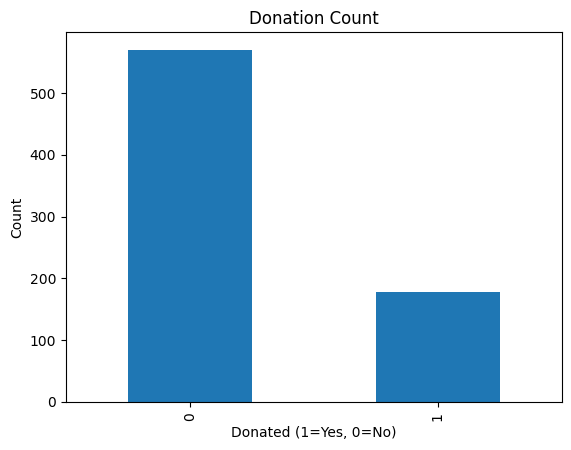

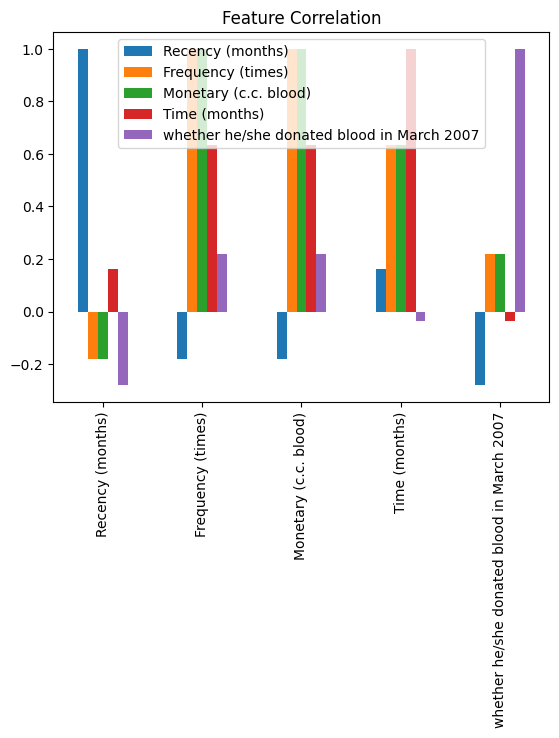

Accuracy: 0.72

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82       113
           1       0.39      0.24      0.30        37

    accuracy                           0.72       150
   macro avg       0.59      0.56      0.56       150
weighted avg       0.68      0.72      0.70       150

Confusion Matrix:
 [[99 14]
 [28  9]]


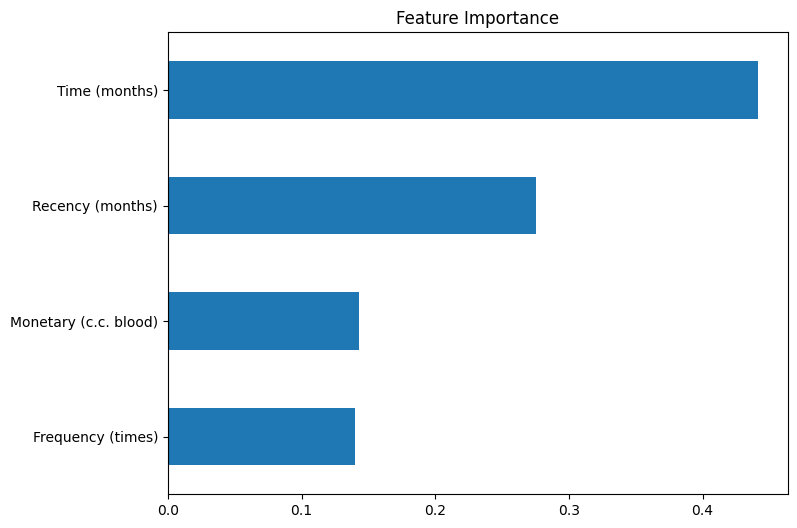

Prediction: Unlikely to Donate


In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import os

# Step 2: Load Blood Transfusion Dataset from Local CSV
df_path = os.path.join(os.getcwd(), 'Transfusion.csv')
if not os.path.exists(df_path):
    raise FileNotFoundError("Transfusion.csv not found. Please download it from Kaggle and place it in the notebook folder.")

# Load dataset
df = pd.read_csv(df_path)
print('Columns in dataset:', df.columns.tolist())

# Step 3: Use the correct target column name from the dataset
target_column = 'whether he/she donated blood in March 2007'

# Step 4: Exploratory Data Analysis (EDA)
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Donation Count
df[target_column].value_counts().plot(kind='bar', title='Donation Count')
plt.xlabel('Donated (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

# Correlation Matrix
df.corr().plot(kind='bar', title='Feature Correlation')
plt.show()

# Step 5: Feature & Target Selection
X = df.drop(target_column, axis=1)
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Build Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Step 9: Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(8,6), title='Feature Importance')
plt.show()

# Step 10: Predict for New Data (Example) -- use correct column names
new_data = pd.DataFrame({
    'Recency (months)': [2],
    'Frequency (times)': [3],
    'Monetary (c.c. blood)': [750],
    'Time (months)': [50]
})
prediction = model.predict(new_data)
print('Prediction:', 'Likely to Donate' if prediction[0]==1 else 'Unlikely to Donate')


